<center><h1>QBUS2820 - Predictive Analytics</h1></center>

<center><h1> Assignment 2</h1></center>


In this assignment we will use linear regression approach and techniques such as cross validation into practice. We will also split train set and validation sets, modelling, and evaluate test performance.

**Content:**
<ul>
        <li> <a class="buttom" href="#Import Training and Test sets">Import Training and Test set</a></li>
		<li> <a class="buttom" href="#Exploratory Data Analysis">Exploratory Data Analysis</a></li>
        <li> <a class="buttom" href="#Train Validation Split">Train Validation Split</a></li>
        <li> <a class="buttom" href="#Standarisaton">Standarisaton</a></li>
        <li> <a class="buttom" href="#Modelling">Modelling</a></li>
        <li> <a class="buttom" href="#K-nearest-neighbours">Summary table</a></li>
        <li> <a class="buttom" href="#Model-evaluation">Model evaluation</a></li>
        <li> <a class="buttom" href="#Exercise">Test set performance</a></li>
</ul>

The notebook relies on the following packages. 

## 1.0 Import 
### 1.1 Import Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy import stats
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from datetime import datetime
warnings.filterwarnings('ignore')
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from scipy.stats import shapiro, norm, probplot

/Users/liujuntong/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/Users/liujuntong/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [102]:
pip install --upgrade scipy


  Using cached statsmodels-0.14.2-cp39-cp39-macosx_10_9_x86_64.whl.metadata (9.2 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 365.3 kB/s eta 0:00:00a 0:00:01
Using cached statsmodels-0.14.2-cp39-cp39-macosx_10_9_x86_64.whl (10.5 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━ 31.7/39.4 MB 4.1 MB/s eta 0:00:02

In [101]:
pip install --upgrade scipy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 759.5 kB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 4.5 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.
yfinance 0.2.12 requires html5lib>=1.1, which is not installed.
pmdarima 2.0.3 requires statsmodels>=0.13.2, but you have statsmodels 0.12.2 which is incompatible.
numba 0.58.0 requires numpy<1.26,>=1.21, but you have numpy 1.26.4 which is incompatible.
scipy 1.7.3 requires numpy<1.23.0,>=1.16.5, but you have numpy 1.26.4 which is incompatible.
statsforecast 1.6.0 require

<span style="color:red">The version of `numpy` is 1.23</span>
<span style="color:red">The version of `statmodels` is 0.12.2</span>

If the code doesn't work, especially in import package and build ARIMA models part, try to input: 
pip install statsmodels==0.12.2
pip install numpy==1.23

Thanks!

In [2]:
# Plot settings
sns.set_context('notebook') 
sns.set_style('ticks')
red='#D62728'
blue='#1F77B4'
%matplotlib inline

In [3]:
# Making sure showing every column and rows in output
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### 1.2 Import training set CPI_train

`CPI_train` is imported and named by `data_train`, contains 120 observations and 2 columns. 

The time column is the date of CPI observation recordings. The variable column, `CPI`, which is most frequently measure of inflation and deflation. 

In [4]:
#data_train = pd.read_csv('CPI_train.csv', index_col='Quarter', parse_dates=True, dayfirst=True)
data_train = pd.read_csv('CPI_train.csv', index_col='Quarter', dayfirst=True)
print(data_train.shape)
data_train.head()

(120, 1)


,CPI
Quarter,
3/1/1990,89.1
6/1/1990,90.1
9/1/1990,90.4
12/1/1990,93.8
3/1/1991,93.0


In [5]:
# Change data_train to DatetimeIndex
data_train.index = pd.to_datetime(data_train.index)

## 2.0 Data Preprocessing

### 2.1 Check Null Values

No NaN or invalid values in the dataset.

In [6]:
data_train.describe()

,CPI
count,120.000000
mean,112.467500
std,11.054275
min,89.100000
25%,102.825000
50%,116.450000
75%,121.325000
max,129.700000


In [7]:
# No null values exists in the dataset
data_train.isna().sum()

CPI    0
dtype: int64

In [8]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 120 entries, 1990-03-01 to 2019-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CPI     120 non-null    float64
dtypes: float64(1)
memory usage: 1.9 KB


In [9]:
data_train.dropna(inplace = True)
data_train.shape

(120, 1)

## 3.0 Exploratory Data Analysis



### 3.1 Statistical Ananlysis on CPI_train

#### **Statistical Analysis (keep 4 decimal points)**
- **Mean** : 112.4675
- **Skewness** : -0.5600
- **Kurtosis** : -1.0056

#### **1. Mean**
Mean is 112.4675 approximately, indicates most data points distribute around the value.

#### **2. Skewness**
Skewness is 112.4675 approximately, indicates data distribution skews to the left. Left skewness means that the left tail is longer or thicker, implying that there are more lower values to the left of the mean.

#### **3. Kurtosis**
Kurtosis is -1.006 approximately. Negative data distribution suggests the distribution has a wild tail.

#### **Key Findings**
As shown in distribution plot and statistics:
**Data Character**:
    - Most data centered between 100 and 130.
    - Distribution plot indicates data distribution is relatively symmetrical, but not completely normal.
    - Negative kurtosis and negative skewness imply the need to pay attention to the non-normality of the data during model selection, which may require data transformation or the selection of a robust statistical model.


In [10]:
y = data_train['CPI'].copy()
y.head()

Quarter
1990-03-01    89.1
1990-06-01    90.1
1990-09-01    90.4
1990-12-01    93.8
1991-03-01    93.0
Name: CPI, dtype: float64

In [11]:
y.mean()

112.46749999999999

In [12]:
# moderately skewed (value is between -0.5 and -1)
# skew <0, skew to the left, there are more points on the left
y.skew()

-0.559979682820824

In [13]:
#kurt is small, data exhibits a light tail distribution and has less outliers
y.kurt()

-1.005640196435809

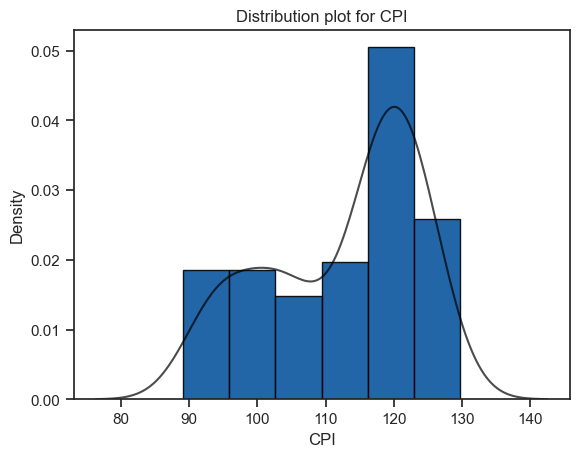

In [14]:
sns.set_context('notebook') 
blue = sns.color_palette('Blues')[-1] 

fig, ax= plt.subplots()
sns.distplot(data_train['CPI'], ax=ax, hist_kws={'alpha': 0.9, 'edgecolor':'black', 'color': blue},
             kde_kws={'color': 'black', 'alpha': 0.7})
ax.set_title('Distribution plot for CPI')
plt.show()

**Findings: Compare Orgional CPI & Log CPI Line Chart**

- Orginal CPI :

    - `CPI` shows a clear upward trend from Jan 1990 to Dec 2019.
    - The variation is relatively stable along trend.
    - Data points fluctuates around the upward trend, yet there is no obvious seasonality or cyclical effect.
    - We will further analysis the potential pattern (eg: seasonality) in following analysis based on data visualisation such as ACF and PACF etc.
- Log CPI : 
    - After implementing log-transformation, the variation of `CPI` is nearly similar to the orginal CPI.
    - Suggests log transformation seems not capable enough to improve the data.

- **Thus, the report will keep use orginal CPI.**

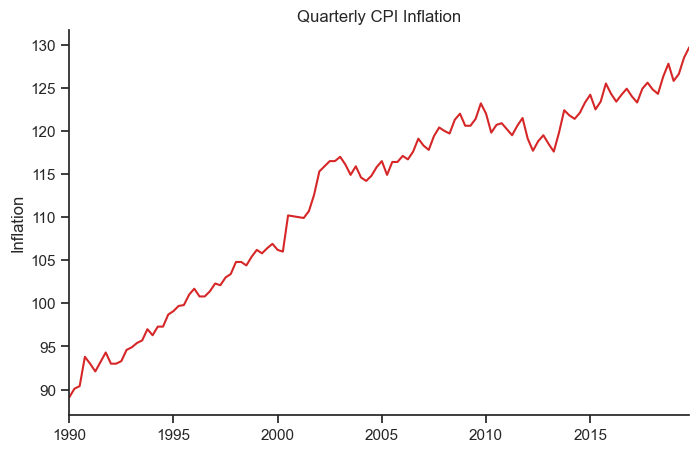

In [15]:
fig, ax= plt.subplots(figsize=(8,5))
y.plot(color=red)
ax.set_xlabel('')
ax.set_ylabel('Inflation')
ax.set_title('Quarterly CPI Inflation')
ax.set_xticks([], minor=True) 
sns.despine()
plt.show()

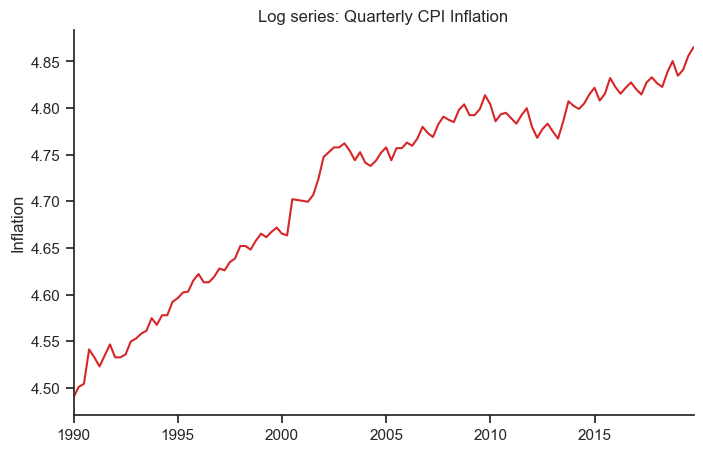

In [16]:
fig, ax= plt.subplots(figsize=(8,5))
np.log(y).plot(color=red)
ax.set_xlabel('')
ax.set_ylabel('Inflation')
ax.set_title('Log series: Quarterly CPI Inflation')
ax.set_xticks([], minor=True) 
sns.despine()
plt.show()

### 3.2 Time Series Decomposition

In [17]:
y = data_train['CPI'].copy()

y.index = y.index.to_period(freq='Q')

ts = data_train['CPI']

In [18]:
y.head()

Quarter
1990Q1    89.1
1990Q2    90.1
1990Q3    90.4
1990Q4    93.8
1991Q1    93.0
Freq: Q-DEC, Name: CPI, dtype: float64

In [19]:
# Since CPI_train is a quartly data, we choose window_size = 4
import statsmodels.tsa.seasonal
window_size = 4
decomposition = statsmodels.tsa.seasonal.seasonal_decompose(ts, filt=np.repeat(1/window_size, window_size))

In [20]:
dir(decomposition)[-6:]

['observed', 'plot', 'resid', 'seasonal', 'trend', 'weights']

Decomposition plot finds that:
1. The time series data indicates a upward trend in the long term period. 
2. Repeated seasonality pattern exists in the data, implies CPI data has regular fluctuates pattern during the year.
3. Residual evenly distributed.

Therefore the report will use model that has is capable to capture trend and seasonality. We will discuss it in `Modelling` section.

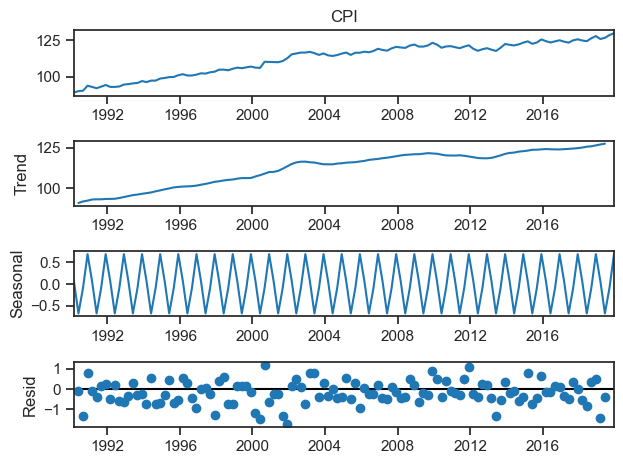

In [21]:
decomposition.plot()
plt.show()

In [22]:
decomposition.seasonal.tail()

Quarter
2018-12-01    0.687205
2019-03-01    0.072550
2019-06-01   -0.671961
2019-09-01   -0.087795
2019-12-01    0.687205
Name: seasonal, dtype: float64

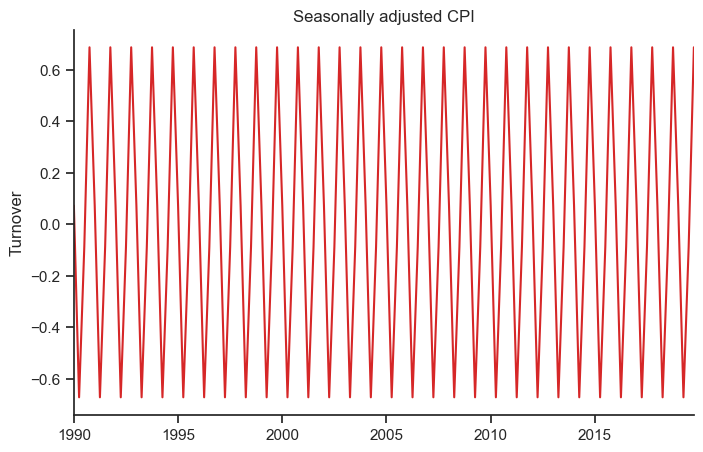

In [23]:
fig, ax= plt.subplots(figsize=(8,5))
decomposition.seasonal.plot(color=red)
ax.set_xlabel('')
ax.set_ylabel('Turnover')
ax.set_title('Seasonally adjusted CPI')
ax.set_xticks([], minor=True) 
sns.despine()
plt.show()

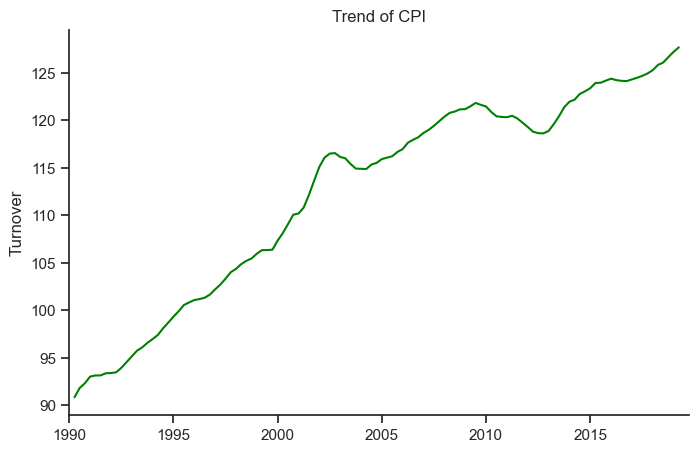

In [24]:
fig, ax= plt.subplots(figsize=(8,5))
decomposition.trend.plot(color="green")
ax.set_xlabel('')
ax.set_ylabel('Turnover')
ax.set_title('Trend of CPI')
ax.set_xticks([], minor=True)
sns.despine()
plt.show()

## 4.0 Data Processing & Accuracy Measures

### 4.1 Standarise the data

Standarisation transforms `data_train` in the same scale, which allows `data_train` conform to normal distribution (i.e. $\mu$ = 0, $\sigma$ = 1).

- `data_train`: refers to `CPI_train` without any data transformation.
- `train`: refers to standarised `CPI_train`.

In [25]:
data_train.head()

,CPI
Quarter,
1990-03-01,89.1
1990-06-01,90.1
1990-09-01,90.4
1990-12-01,93.8
1991-03-01,93.0


In [26]:
from sklearn.preprocessing import StandardScaler

train = data_train.copy()

scaler = StandardScaler()

scaler.fit(train[['CPI']])

train['CPI'] = scaler.transform(train[['CPI']])

In [27]:
train.head()

,CPI
Quarter,
1990-03-01,-2.122751
1990-06-01,-2.031909
1990-09-01,-2.004657
1990-12-01,-1.695794
1991-03-01,-1.768467


In [28]:
y_stand = train['CPI'].copy()

y_stand.index = y_stand.index.to_period(freq='Q')

ts_stand = train['CPI']

1. **MSE (Mean Squared Error)**: MSE is employed as main accuracy measure to evaluate the performance of the model. The reason of using MSE is it penalizes heavily on large errors, yet it has limitation of hard interpretation (CSDN, 2019).

2. **R-squared**: R-squared is employed to determine the proportion of variance in a dependent variable that can be predicted or explained by an independent variable (Abba, 2023).

3. **AIC and BIC**: For in-sample fit model comparison, we use Bayesian information criterion (BIC) and Akaike information criterion (AIC). The principle of AIC and BIC is penalized on fitted residuals. 

**The report use in sample MSE to see whether models perform well on the train set, and out-sample MSE (test set MSE) for model selection.**

In [29]:
def MSE(y,y_hat):
    mse = np.mean((y - y_hat) ** 2)
    return(mse)

Point forecast:

In [30]:
# generate 8-step-forecast
h = 8
test=pd.period_range(start=y.index[-1]+1, periods=h, freq='Q')
pred=pd.Series(np.repeat(y.iloc[-1], h), index=test) # the forecast repeats the last observed values h times
pred

2020Q1    129.7
2020Q2    129.7
2020Q3    129.7
2020Q4    129.7
2021Q1    129.7
2021Q2    129.7
2021Q3    129.7
2021Q4    129.7
Freq: Q-DEC, dtype: float64

In [31]:
resid=y-y.shift(1) # the shift lags the series by one period
sigma = resid.std()
round(sigma,3)

1.129

In [32]:
intv = pd.concat([pred-stats.norm.ppf(0.975)*sigma*np.sqrt(np.arange(1,h+1)),
                   pred+stats.norm.ppf(0.975)*sigma*np.sqrt(np.arange(1,h+1))], axis=1)
intv.round(3)

,0,1
2020Q1,127.488,131.912
2020Q2,126.571,132.829
2020Q3,125.868,133.532
2020Q4,125.275,134.125
2021Q1,124.753,134.647
2021Q2,124.281,135.119
2021Q3,123.847,135.553
2021Q4,123.442,135.958


### 5.2 Seasonal Naive 

In [33]:
# 8-step-ahead forecast
h = 8 

test = pd.period_range(start=y.index[-1] + 1, periods=h, freq='Q')

# Using the value in the same quarter of last year to predict
seasonal_period = 4
pred = pd.Series([y.iloc[-seasonal_period + i % seasonal_period] for i in range(h)], index=test)
print(pred)

2020Q1    125.8
2020Q2    126.6
2020Q3    128.5
2020Q4    129.7
2021Q1    125.8
2021Q2    126.6
2021Q3    128.5
2021Q4    129.7
Freq: Q-DEC, dtype: float64


### 5.3 Simple Exponential Smoothing

#### 5.3.1 Modelling

In [34]:
# Without standarisation
import forecast 
ses=forecast.ses(y)
ses.fit()
fitted=pd.Series(ses.smooth(), index=y.index)
ses.summary()

 Simple exponential smoothing

 Smoothing parameter:
 alpha  1.000 (0.091) 

 In-sample fit:
 MSE               1.368
 Log-likelihood   -189.088
 AIC               384.176
 BIC               392.539


In [35]:
# printed MSE again since results should keep 4 decimal points
mse = mean_squared_error(data_train['CPI'], fitted)
print(f'MSE: {mse}')

MSE: 1.3683333333333338


Visualise the model performance on the whole train set.

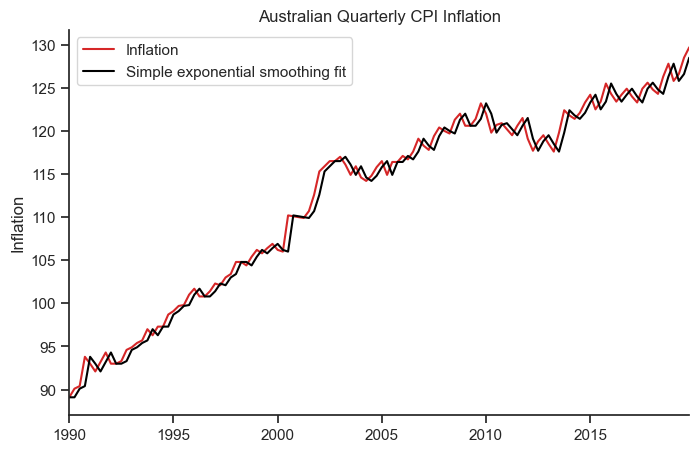

In [36]:
# set alpha = 1 -> because we find from above the optimal in-sample fit smoothing parameter alpha is 1 (with standard deviation 0.091)
fig, ax= plt.subplots(figsize=(8,5))
y.plot(color=red, label='Inflation')
fitted.plot(color='black', label='Simple exponential smoothing fit', alpha=1)
ax.set_xlabel('')
ax.set_ylabel('Inflation')
ax.set_title('Australian Quarterly CPI Inflation')
ax.set_xticks([], minor=True) 
plt.legend(loc='best')
sns.despine()
plt.show()

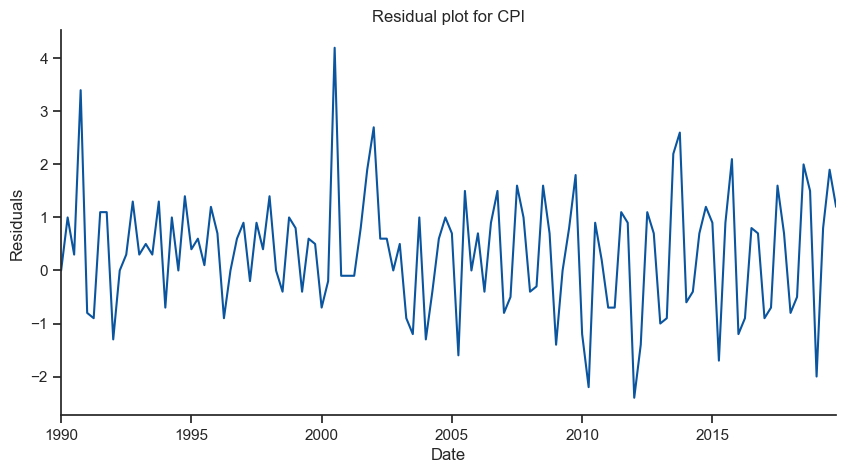

In [37]:
resid=y-fitted
fig, ax= plt.subplots(figsize=(10,5))
resid.plot(color=blue)
ax.set_xlabel('Date')
ax.set_ylabel('Residuals')
ax.set_xticks([], minor=True) 
ax.set_title('Residual plot for CPI')
sns.despine()
plt.show()

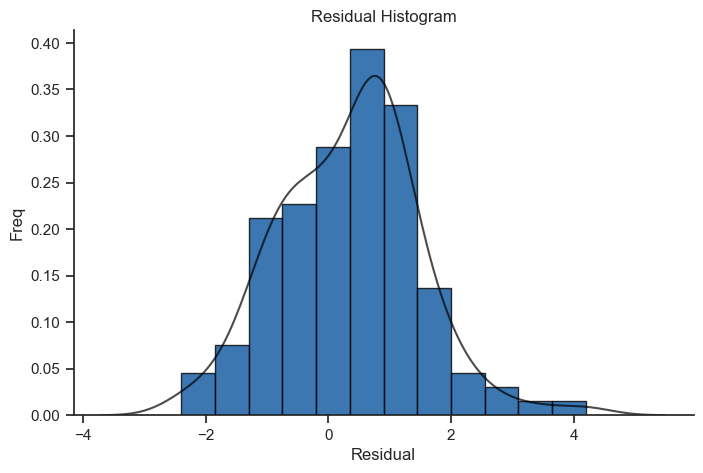

In [38]:
def hist(series):
    fig, ax= plt.subplots(figsize=(8,5))
    ax.set_xlabel('Residual')
    ax.set_ylabel('Freq')
    ax.set_title('Residual Histogram')
    sns.distplot(series, ax=ax, hist_kws={'alpha': 0.8, 'edgecolor':'black', 'color': blue},  
                 kde_kws={'color': 'black', 'alpha': 0.7})
    sns.despine()
    return fig, ax

hist(resid)
plt.show()

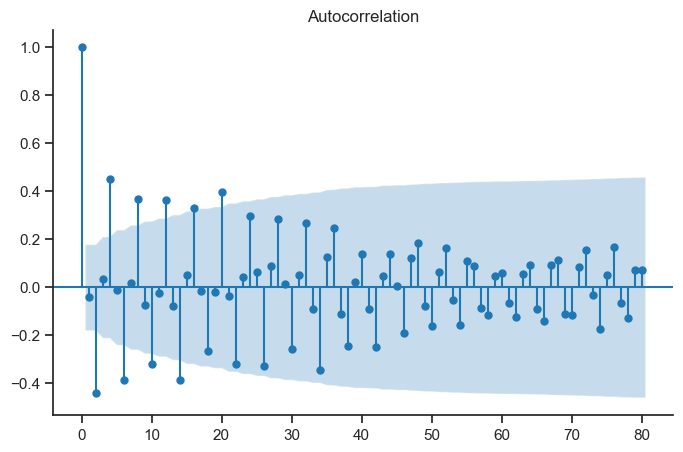

In [39]:
fig, ax = plt.subplots(figsize=(8,5))
sm.graphics.tsa.plot_acf(resid, lags=80, ax=ax)
sns.despine()
plt.show()

Use standarised data to see whether the SES model performance will be improved.

In [40]:
# Model with standarisation
ses=forecast.ses(y_stand)
ses.fit()
fitted_stand =pd.Series(ses.smooth(), index=y_stand.index)

In [41]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
CPI_stand = train['CPI'] 

ses_model = SimpleExpSmoothing(CPI_stand)
fitted_model = ses_model.fit()

fitted_values = pd.Series(fitted_model.fittedvalues, index=CPI_stand.index)

fitted_model.summary()

Dep. Variable:,CPI,No. Observations:,120
Model:,SimpleExpSmoothing,SSE,1.355
Optimized:,True,AIC,-534.041
Trend:,None,BIC,-528.466
Seasonal:,None,AICC,-533.693
Seasonal Periods:,None,Date:,"Wed, 29 May 2024"
Box-Cox:,False,Time:,17:33:48
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.0000000,alpha,True
initial_level,-2.1232955,l.0,True


In [42]:
# Un-standarise 
fitted_values = pd.DataFrame(fitted_model.fittedvalues, index=CPI_stand.index)

# Un-standarized fitted value
inversed_ses = scaler.inverse_transform(fitted_values)

# convert un-standarized result into series for visualisation
inversed_ses = pd.Series(inversed_ses.flatten(), index=CPI_stand.index)

# fitted_values: standarised
# inversed_ses / fitted: unstandarised

In [43]:
mse = mean_squared_error(data_train['CPI'], inversed_ses)
print(f'MSE: {mse}')

MSE: 1.3683336342502168


Data standarised SES model seems not capable to capture the data perfromance. 

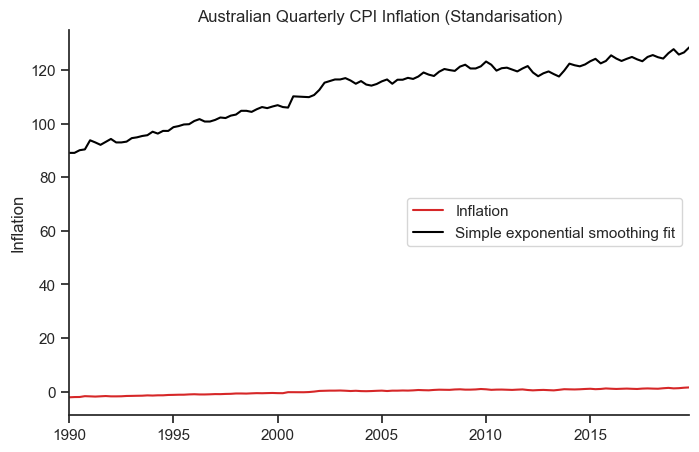

In [44]:
# data-standarisation SES visualisation
fig, ax= plt.subplots(figsize=(8,5))
y_stand.plot(color=red, label='Inflation')
fitted.plot(color='black', label='Simple exponential smoothing fit', alpha=1)
ax.set_xlabel('')
ax.set_ylabel('Inflation')
ax.set_title('Australian Quarterly CPI Inflation (Standarisation)')
ax.set_xticks([], minor=True) 
plt.legend(loc='best')
sns.despine()
plt.show()

**Findings of SES modelling**: 

The report finds that after standarisation, the optimal alpha is exactly the same as without doing standarisation. There is only slightly difference between MSE result of the two models. The MSE of unstandarised model is slightly better than the standarised model.


| SES Model | in-sample MSE | 
|----------|----------|
|    Unstandarised SES Model    |   1.3683333333333338   |   
|    Standarised SES Model    |     1.3683333351785951    |   


**Decision:**

Based on above data visualisation, we find that un-standarised SES has better performance. Thus, the report choose to analysis on **unstandarised SES** in the following section.


### 5.3.2 SES Model Diagnostics

The report employs residual plot, residual ACF and density plot to check the model performance.

In [45]:
resid=y-fitted

The residual fluctuates around 0, which suggests whetehr data follows Gussian distribution.

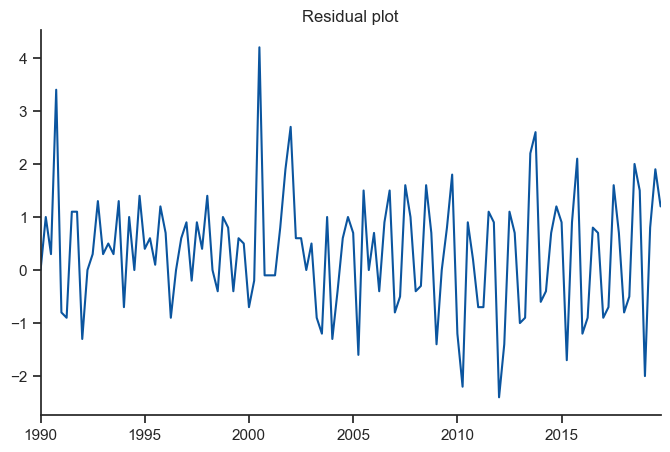

In [46]:
fig, ax= plt.subplots(figsize=(8,5))
resid.plot(color=blue)
ax.set_xlabel('')
ax.set_xticks([], minor=True) 
ax.set_title('Residual plot')
sns.despine()
plt.show()

ACF plot the report finds that with time changing, the correlation slowly converge upward and downward with lags increases. This indicates the model has trend and seasonality. The blue part is the confidence band, which suggests correlation is significant after lag 20 approximately.

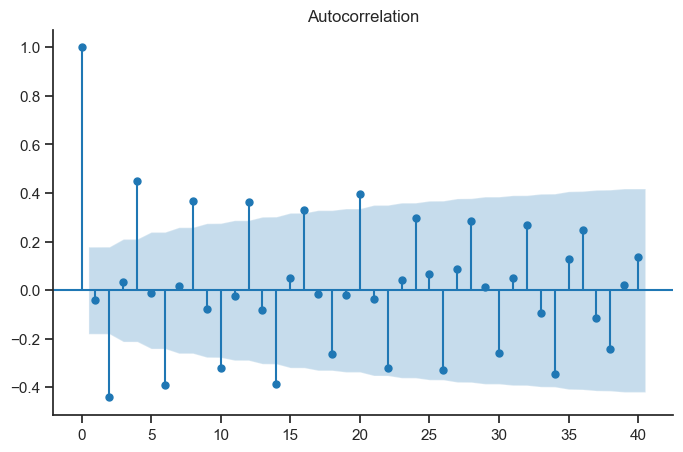

In [47]:
fig, ax = plt.subplots(figsize=(8,5))
sm.graphics.tsa.plot_acf(resid, lags=40, ax=ax)
sns.despine()
plt.show()

Shapiro-Wilk Test is conducted to test the data normality. 

Null Hypothesis ($H_0$): The data follows a normal distribution.

Alternative Hypothesis ($H_a$): The data does not follow a normal distribution.

Since p = 0.1664, which is bigger than 0.05, we could not reject the null hypothesis that the residual follows normal distribution.

The QQ plot blue dot is the actual value, where the red line is the theoretically normally distributed data. The blue dots distributes among the red line, suggetss the data is relatively normal distributed. 

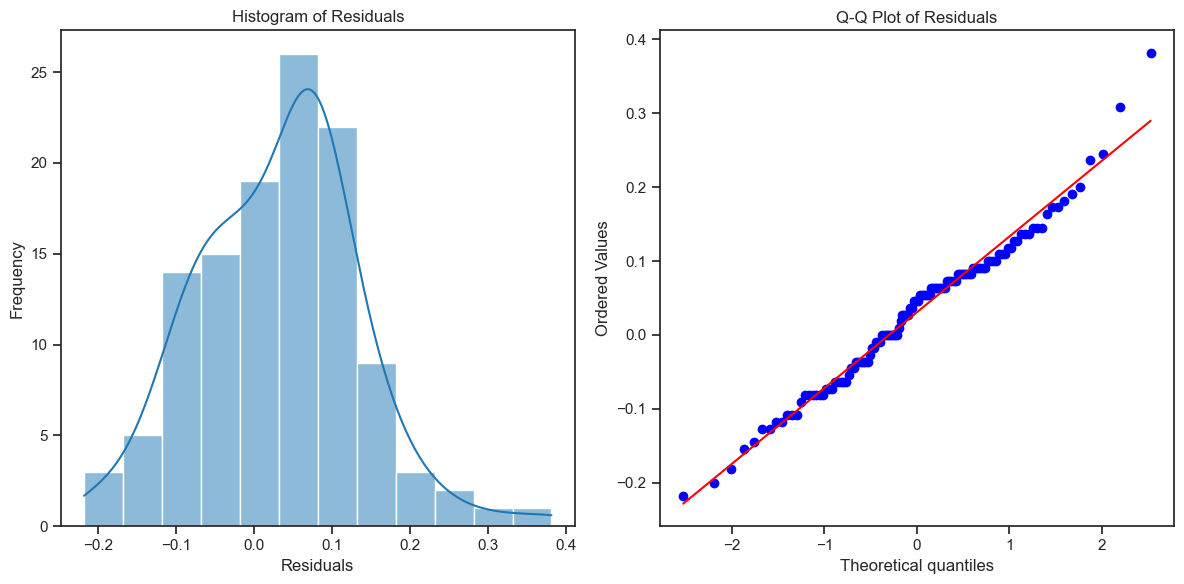

Shapiro-Wilk Test Statistic: 0.9839872121810913
p-value: 0.16636349260807037
H0: We cannot reject residuals is normally distributed


In [48]:
# Unstandarised SES residual
residuals = ses.resid

# Plot residual frequency plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

# QQ plot
plt.subplot(1, 2, 2)
probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')

plt.tight_layout()
plt.show()

# Shapiro-Wilk test: test normality
stat, p_value = shapiro(residuals)
print(f'Shapiro-Wilk Test Statistic: {stat}')
print(f'p-value: {p_value}')

# Check p-value
if p_value > 0.05:
    print("H0: We cannot reject residuals is normally distributed")
else:
    print("Ha/reject H0: Residuals do not appear to be normally distributed")


### 5.3.3 SES: Model Validation

In [49]:
validation=y['2004Q1':].index # the validation period is Q1 2004 onwards
start = y.index.get_loc('2004Q1') # numerical index corresponding to Q1 2005

pred1 = []
pred2 = []
actual= []
for i in range(start, len(y)):
    
    actual.append(y.iloc[i]) # actual value
    
    pred1.append(y.iloc[i-1]) # random walk forecast
    
    model = forecast.ses(y.iloc[:i]) 
    model.fit()
    pred2.append(model.forecast(1)[0]) # SES forecast

columns=['RW', 'SES', 'Actual']
results = np.vstack([pred1,pred2,actual]).T
results = pd.DataFrame(results, columns=columns, index=validation)

Random Walk performs better than simple exponential smoothing.

In [50]:
from statlearning import rmse_jack
from statlearning import r2_jack

table = pd.DataFrame(0.0, index=results.columns[:-1], columns=['RMSE','MSE','SE','R2'])
for i in range(2):
    rmse, se = rmse_jack(results.iloc[:, i], results.iloc[:, -1])
    table.iloc[i, 0] = rmse  # RMSE
    table.iloc[i, 2] = rmse ** 2  # MSE
    table.iloc[i, 1] = se    # SE

    r2 = r2_score(results.iloc[:, -1], results.iloc[:, i])
    table.iloc[i, 3] = r2  # R2
table.round(4)

,RMSE,MSE,SE,R2
RW,1.2164,0.0785,1.4797,0.8821
SES,1.7228,0.1508,2.9681,0.7636


### 5.4 Holt-Winters

### 5.4.1 Additive HW modelling, and tuning parameter
Holt-Winters model is implemented when data has clear trend and seasonal effect.

Based on the decomposition plot, the data has upward trend and fixed seasonality. Thus, the most suitable Holte-Winters Model is `Additive Holt-Winters with Damped trend`.

M stands for the length of the seasonal cycle. The report tried different m, and lastly found m = 4 is the optimal for Holt-Winters model, which is explainable because `CPI` is a quartly data with 4 records in each year.

When M = 4, the in-sample MSE is 1.187.


In [51]:
ahw=forecast.holtwinters(y, additive=True, damped=False, m=4) #m=4 since 4 terms per year
ahw.fit()
ahw.summary()

 Additive Holt-winters exponential smoothing

 Smoothing parameters:
 alpha (level)    0.640 (0.095)
 beta  (trend)    0.049 (0.039)
 delta (seasonal) 0.950 (0.247)
 
 In-sample fit:
 MSE               1.187
 RMSE              1.089
 Log-likelihood   -180.552
 AIC               369.105
 BIC               380.254


In [52]:
ahw2=forecast.holtwinters(y, additive=True, damped=False, m=8) 
ahw2.fit()
ahw2.summary()

 Additive Holt-winters exponential smoothing

 Smoothing parameters:
 alpha (level)    0.591 (0.136)
 beta  (trend)    0.025 (0.020)
 delta (seasonal) 0.884 (0.220)
 
 In-sample fit:
 MSE               1.695
 RMSE              1.302
 Log-likelihood   -201.932
 AIC               411.864
 BIC               423.014


In [53]:
ahw3=forecast.holtwinters(y, additive=True, damped=False, m=12) 
ahw3.fit()
ahw3.summary()

 Additive Holt-winters exponential smoothing

 Smoothing parameters:
 alpha (level)    0.573 (0.068)
 beta  (trend)    0.019 (0.013)
 delta (seasonal) 1.000 (0.209)
 
 In-sample fit:
 MSE               2.086
 RMSE              1.444
 Log-likelihood   -214.387
 AIC               436.775
 BIC               447.925


The smoothed series based on additive approach, pitched m = 4. The predicted data is quite close to the orginal time series. 

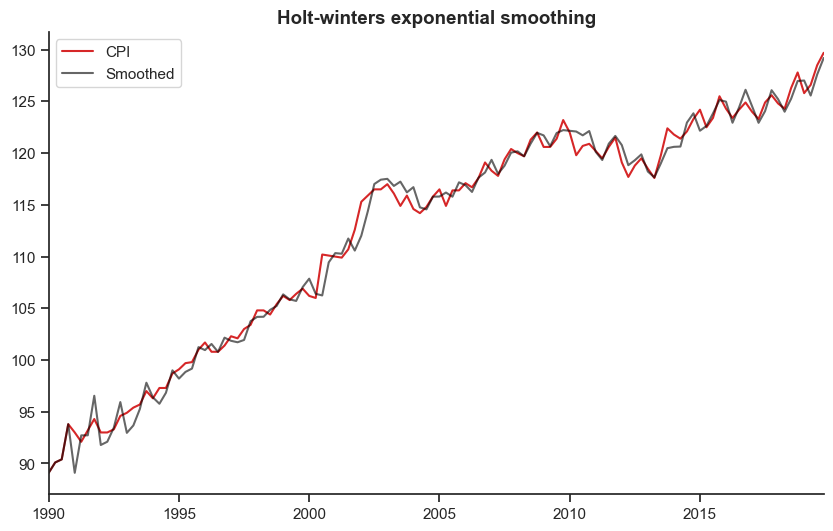

In [54]:
smoothed=pd.Series(ahw.smooth(), index=y.index)

fig, ax= plt.subplots(figsize=(10,6))

y.plot(color='#D62728', label='CPI')
smoothed.plot(color='black', label='Smoothed', alpha=0.6)
plt.legend(loc='best')
ax.set_xlabel('')
ax.set_xticks([], minor=True)
ax.set_title(r'Holt-winters exponential smoothing', fontsize=13.5, fontweight='bold')
sns.despine()
plt.show()

### 5.4.2 Model diagnostics

Based on the residual ACF plot, after lag 28, the lags are statistically insignificant.

However, the Shapiro-Wilk Test and QQ-plot indicate that the residual is not normally distributed. 

Whether residual follows normal distribution do influence on interval forecast, yet it has less influence on  point forecast (Deng, ECMT2130, 2023). 

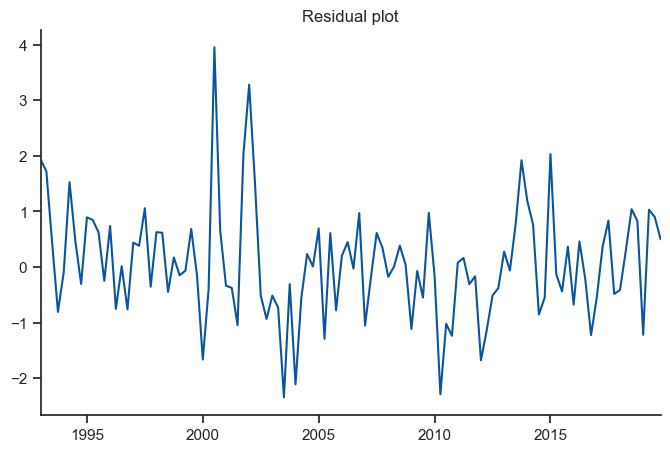

In [55]:
resid = (y-ahw.smooth())[12:] # we remove the first 12 observations as they are for initialisitation only

fig, ax= plt.subplots(figsize=(8,5))
resid.plot(color=blue)
ax.set_xlabel('')
ax.set_xticks([], minor=True) 
ax.set_title('Residual plot')
sns.despine()
plt.show()

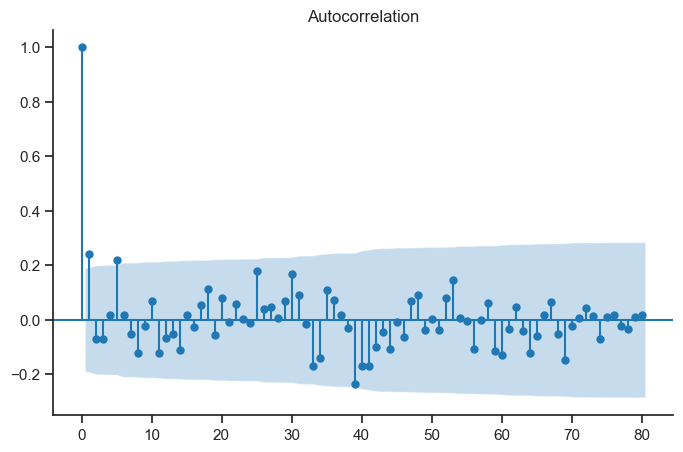

In [56]:
fig, ax = plt.subplots(figsize=(8,5))
sm.graphics.tsa.plot_acf(resid, lags=80, ax=ax)
sns.despine()
plt.show()

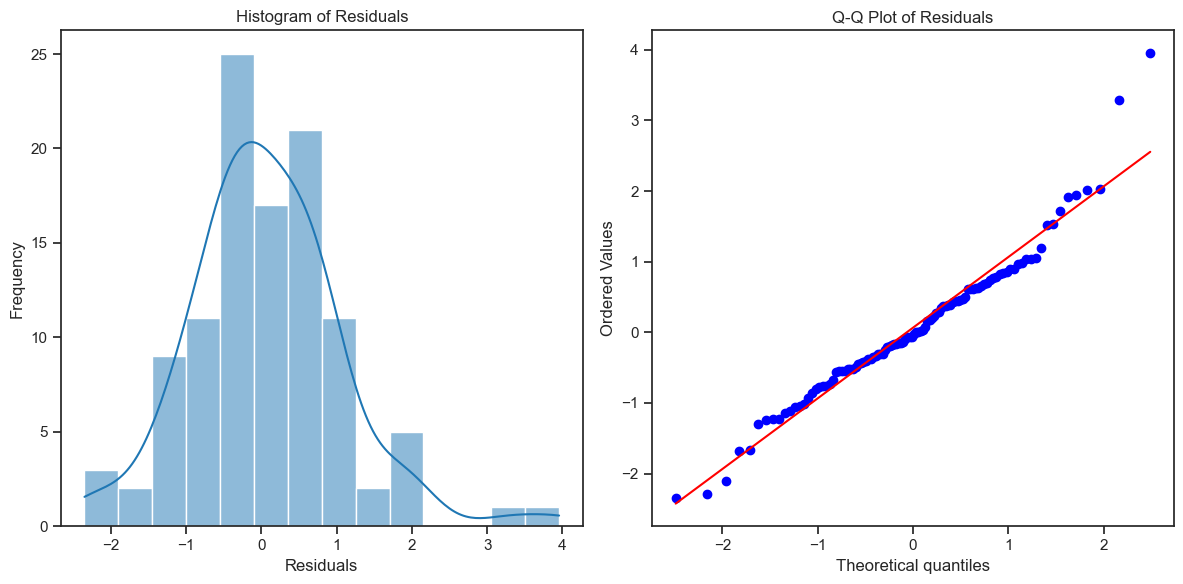

Shapiro-Wilk Test Statistic: 0.9631882905960083
p-value: 0.004398128483444452
Ha/reject H0: Residuals do not appear to be normally distributed


In [57]:
# Redisual histogram
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(resid, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

# Q-Q plot
plt.subplot(1, 2, 2)
probplot(resid, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')

plt.tight_layout()
plt.show()

# Shapiro-Wilk test: test normality
stat, p_value = shapiro(resid)
print(f'Shapiro-Wilk Test Statistic: {stat}')
print(f'p-value: {p_value}')

# Check p-value
if p_value > 0.05:
    print("H0: Residuals seems normally distributed")
else:
    print("Ha/reject H0: Residuals do not appear to be normally distributed")

In [58]:
print('Residual skewness: {:.3f}'.format(resid.skew()))
print('Residual kurtosis: {:.3f}'.format(resid.kurt()))

Residual skewness: 0.653
Residual kurtosis: 2.160


#### 5.4.3 Model Validation

In [59]:
ts=np.log(y) # log series for the log-additive model

validation=y['2004Q1':].index
start = y.index.get_loc('2004Q1') 

pred1 = [] # seasonal random walk
pred2 = [] # additive holt winters
actual= []

for i in range(start, len(y)):
    
    actual.append(y.iloc[i]) # actual value
    
    pred1.append(y.iloc[i-12]) # seasonal random walk forecast
    
    model = forecast.holtwinters(y.iloc[:i], additive=True, damped=False, m=4)
    model.fit()
    pred2.append(model.forecast(1)[0]) # additive holt winters forecast

columns=['Seasonal RW', 'Additive', 'Actual']
results = np.vstack([pred1,pred2,actual]).T
results = pd.DataFrame(results, columns=columns, index=validation)

In [60]:
table = pd.DataFrame(0.0, index=results.columns[:-1], columns=['RMSE','MSE','SE','R2'])
for i in range(2):
    rmse, se = rmse_jack(results.iloc[:, i], results.iloc[:, -1])
    table.iloc[i, 0] = rmse  # RMSE
    table.iloc[i, 2] = rmse ** 2  # MSE
    table.iloc[i, 1] = se    # SE

    r2 = r2_score(results.iloc[:, -1], results.iloc[:, i])
    table.iloc[i, 3] = r2  # R2
table.round(4)

,RMSE,MSE,SE,R2
Seasonal RW,3.2614,0.1882,10.6370,0.1528
Additive,1.1429,0.1007,1.3062,0.8960


## 5.5 Trend Corrected Exponential Smoothing

Since `CPI` shows upward trend, the report employed this model for analysising trend. 

In [61]:
ts = y

In [62]:
holt = forecast.holt(ts)
holt.fit()
holt.summary()

 Holt (trend corrected) exponential smoothing

 Smoothing parameters: 
 alpha (level) 0.865 (0.202)
 beta (trend)  0.029 (0.028)
 
 In-sample fit:
 MSE               1.302
 Log-likelihood   -186.116
 AIC               378.232
 BIC               386.595


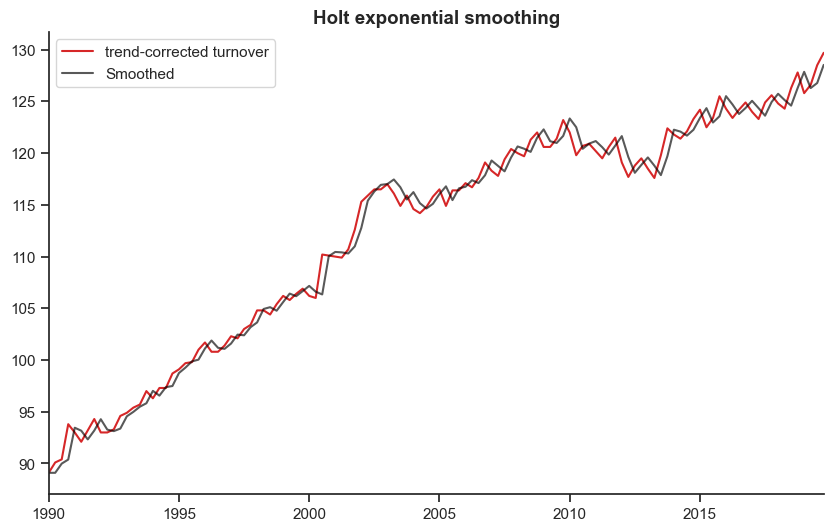

In [63]:
smoothed=pd.Series(holt.smooth(), index=y.index)

fig, ax= plt.subplots(figsize=(10,6))

ts.plot(color='#D62728', label='trend-corrected turnover')
smoothed.plot(color='black', label='Smoothed', alpha=0.65)
plt.legend(loc='best')
ax.set_xlabel('')
ax.set_xticks([], minor=True)
ax.set_title(r'Holt exponential smoothing', fontsize=13.5, fontweight='bold')
sns.despine()
plt.show()

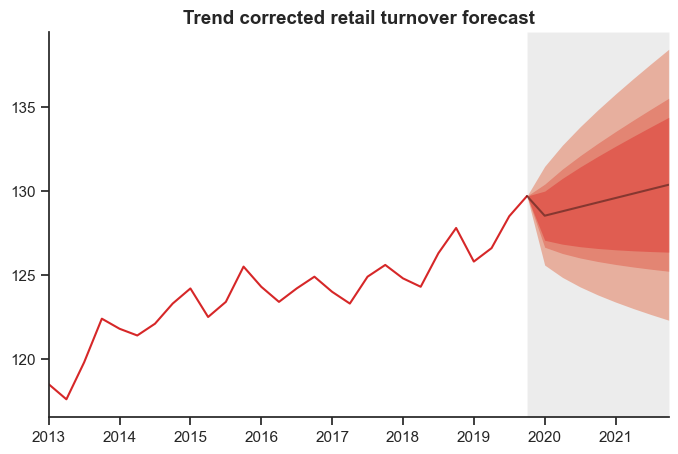

In [64]:
h=8

test=pd.period_range(start=ts.index[-1]+1, periods=h, freq='Q')

pred=pd.Series(holt.forecast(h), index=test)

intv1=pd.DataFrame(holt.intervalforecast(h, level=.8), index=test)
intv2=pd.DataFrame(holt.intervalforecast(h, level=.9), index=test)
intv3=pd.DataFrame(holt.intervalforecast(h, level=.99), index=test)

fig, ax = forecast.fanchart(ts['01-2013':], pred, intv1, intv2, intv3)
ax.set_xlabel('')
ax.set_xticks([], minor=True)
plt.title('Trend corrected retail turnover forecast', fontsize=13.5, fontweight='bold')

sns.despine()
plt.show()

## 5.6 AR, ARIMA

Before we use AR, ARIMA model, a very important property should be hold, that is **stationarity**. Stationarity indicates that `CPI` doesn't contain trend, seasonality etc, that is statistical properties (such as mean, variance, coveriance) does not change over time. Stationarity ensures data does not effected by time changing. Stationary time series usually enable to generate more effective and accurate statistic forecast.

Below is the data pattern of `CPI`. ACF dies down, PACF cuts off after lag 2. This suggests the orginal time series plot has an explicit trend. 

Yet the report still need to do differencing the data removing the seasonal and trend effect in data. Differencing makes sure stationary assumption holds. 

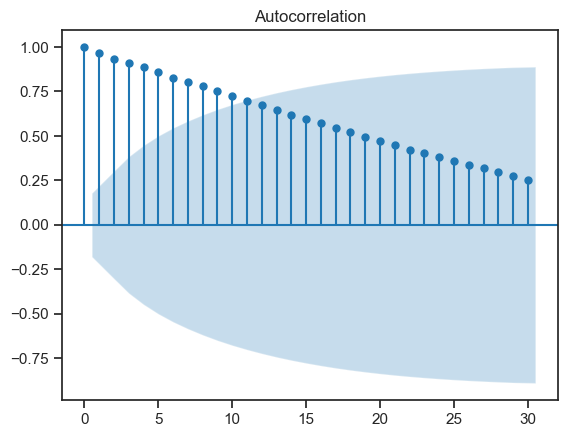

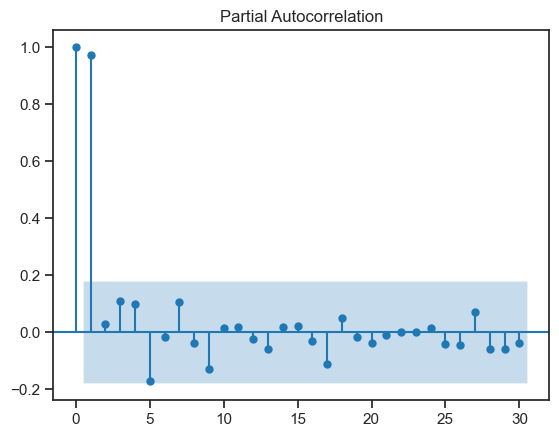

In [65]:
import statsmodels.api as smt
from pandas.plotting import autocorrelation_plot

#ACF plot
smt.graphics.tsa.plot_acf(data_train, lags=30, alpha = 0.05)

#PACF plot
smt.graphics.tsa.plot_pacf(data_train, lags=30, alpha=0.05)
plt.show()

ADF test and kpss test are conducted to test the stationary.

Orginal CPI doesn't pass any of the test, suggests the data is non-stationary. In order to solve the problem, we conducted first difference.

https://www.analyticsvidhya.com/blog/2021/06/statistical-tests-to-check-stationarity-in-time-series-part-1/#:~:text=There%20are%20various%20statistical%20tests,unit%20root%20in%20the%20data.

https://analyticsindiamag.com/topics/dickey-fuller-test-in-time-series-analysis/

https://stackoverflow.com/questions/73554240/interpret-the-results-of-adf-and-kpss-tests#:~:text=The%20KPSS%20test%20is%20a,is%20a%20unit%2Droot%20test.

In [66]:
# ADF Test: non-stationary
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

adf_test(data_train['CPI'])

Results of Dickey-Fuller Test:
Test Statistic                  -1.456046
p-value                          0.555132
#Lags Used                       6.000000
Number of Observations Used    113.000000
Critical Value (1%)             -3.489590
Critical Value (5%)             -2.887477
Critical Value (10%)            -2.580604
dtype: float64


In [67]:
# kpss-test: reject the null, non-stationary
from statsmodels.tsa.stattools import kpss

def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c', nlags="auto")
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','#Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

kpss_test(data_train['CPI'])

Results of KPSS Test:
Test Statistic           1.720336
p-value                  0.010000
#Lags Used               6.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


#### First difference

In [68]:
diff_data_org = pd.Series.diff(data_train)

# Checking the first entry in diff_data
diff_data_org.iloc[0]

0   NaN
Name: 1990-03-01 00:00:00, dtype: float64

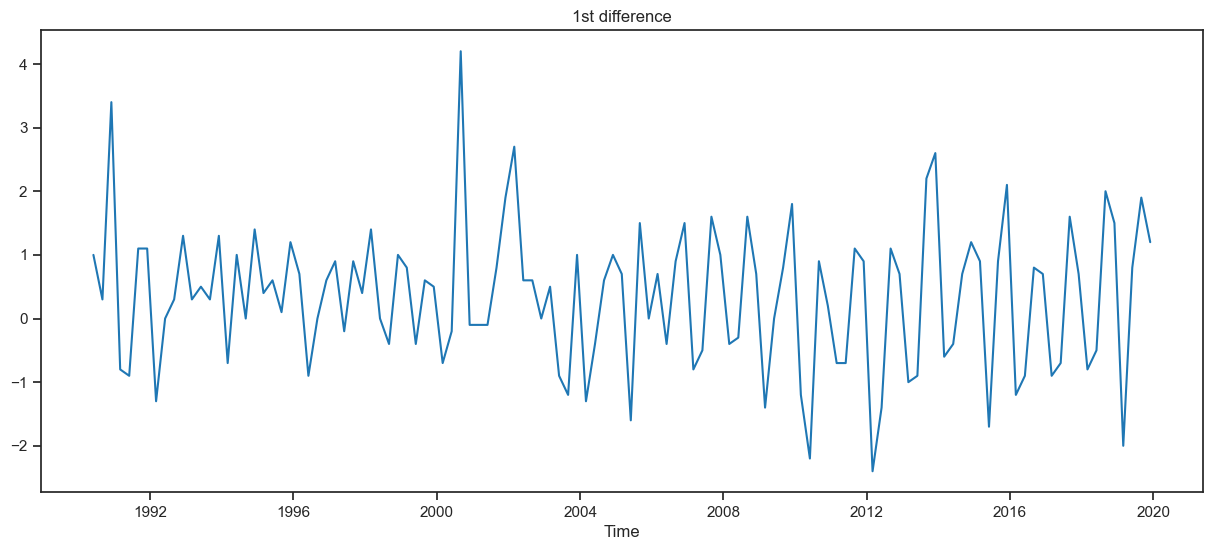

In [69]:
# Discard the nan value
diff_data = diff_data_org.dropna()

# Plot the differenced data
plt.figure(figsize=(15,6))
plt.plot(diff_data)
plt.xlabel('Time')
plt.title('1st difference')
plt.show()

After 1st difference, `CPI` data is within the confidence band, which appears to be stationary. 

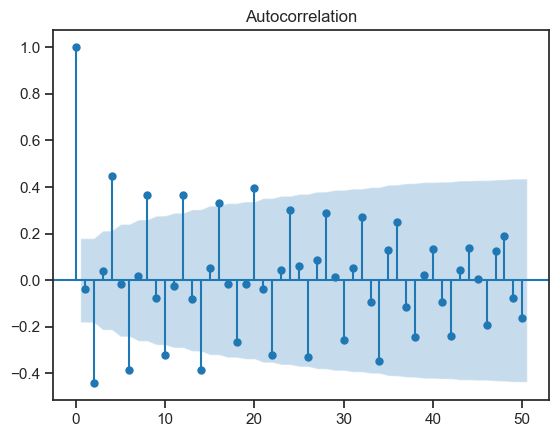

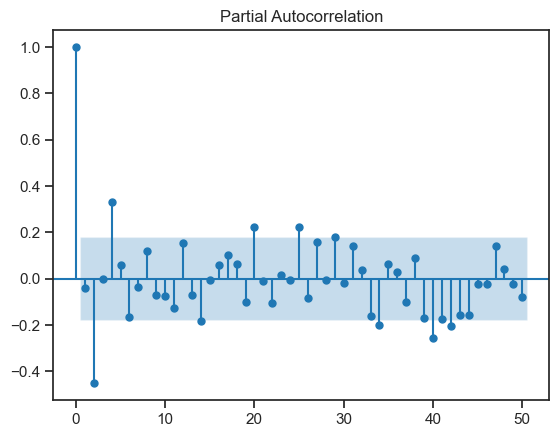

In [70]:
# For differenced time series
smt.graphics.tsa.plot_acf(diff_data, lags=50, alpha = 0.05)
smt.graphics.tsa.plot_pacf(diff_data, lags=50, alpha = 0.05)
plt.show()

Check stationary based on statitical test:

ADF test p value < 0.05, suggests the data after first difference is staionary;
KPSS test p value > 0.05, also suggests stationary. 

In [71]:
adf_test(diff_data)

Results of Dickey-Fuller Test:
Test Statistic                  -4.310427
p-value                          0.000426
#Lags Used                       5.000000
Number of Observations Used    113.000000
Critical Value (1%)             -3.489590
Critical Value (5%)             -2.887477
Critical Value (10%)            -2.580604
dtype: float64


In [72]:
kpss_test(diff_data)

Results of KPSS Test:
Test Statistic            0.299938
p-value                   0.100000
#Lags Used               71.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


### ARIMA

ARIMA(1,1,0): AR(1) with first difference

In [73]:
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

np.random.seed(2820)
n_samples = 1000 

model = ARIMA(diff_data, order=(1, 1, 0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                      0   No. Observations:                  119
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -218.788
Date:                Wed, 29 May 2024   AIC                            441.577
Time:                        17:33:57   BIC                            447.118
Sample:                    06-01-1990   HQIC                           443.827
                         - 12-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3062      0.093     -3.281      0.001      -0.489      -0.123
sigma2         2.3858      0.319      7.490      0.000       1.762       3.010
Ljung-Box (L1) (Q):                   3.89   Jarque-

In [74]:
forecast_arima = pd.DataFrame(model_fit.forecast(120))
forecast_arima.set_index(data_train.index, inplace = True)
forecast_arima.head()

,predicted_mean
Quarter,
1990-03-01,1.414325
1990-06-01,1.348703
1990-09-01,1.368795
1990-12-01,1.362644
1991-03-01,1.364527


In [75]:
mse = mean_squared_error(data_train, forecast_arima)  # we use iloc[1:] because differencing reduces the length by 1
print("MSE: {:.4f}".format(mse))

MSE: 12465.0914


In [76]:
from statsmodels.tsa.arima.model import ARIMA
np.random.seed(2820)
n_samples = 1000 
model = ARIMA(data_train, order=(2,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                    CPI   No. Observations:                  120
Model:                 ARIMA(2, 1, 0)   Log Likelihood                -180.911
Date:                Wed, 29 May 2024   AIC                            367.823
Time:                        17:33:57   BIC                            376.160
Sample:                    03-01-1990   HQIC                           371.208
                         - 12-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0558      0.093      0.597      0.550      -0.127       0.239
ar.L2         -0.3357      0.092     -3.668      0.000      -0.515      -0.156
sigma2         1.2222      0.128      9.512      0.0

In [77]:
forecast_arima = pd.DataFrame(model_fit.forecast(120))
forecast_arima.set_index(data_train.index, inplace = True)
forecast_arima.head()

,predicted_mean
Quarter,
1990-03-01,129.129025
1990-06-01,128.694300
1990-09-01,128.861752
1990-12-01,129.017044
1991-03-01,128.969484


In [78]:
mse = mean_squared_error(data_train, forecast_arima)  # we use iloc[1:] because differencing reduces the length by 1
print("MSE: {:.4f}".format(mse))

MSE: 392.4599


In [79]:
from statsmodels.tsa.arima.model import ARIMA
np.random.seed(2820)
n_samples = 1000 
model = ARIMA(data_train, order=(4,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                    CPI   No. Observations:                  120
Model:                 ARIMA(4, 1, 0)   Log Likelihood                -166.945
Date:                Wed, 29 May 2024   AIC                            343.889
Time:                        17:33:58   BIC                            357.785
Sample:                    03-01-1990   HQIC                           349.532
                         - 12-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0299      0.082      0.365      0.715      -0.131       0.191
ar.L2         -0.1744      0.080     -2.186      0.029      -0.331      -0.018
ar.L3          0.1076      0.107      1.004      0.3

In [80]:
forecast_arima = pd.DataFrame(model_fit.forecast(120))
forecast_arima.set_index(data_train.index, inplace = True)
forecast_arima.head()

,predicted_mean
Quarter,
1990-03-01,128.556291
1990-06-01,128.891024
1990-09-01,130.117344
1990-12-01,130.533186
1991-03-01,129.833460


In [81]:
mse = mean_squared_error(data_train, forecast_arima)  # we use iloc[1:] because differencing reduces the length by 1
print("MSE: {:.4f}".format(mse))

MSE: 461.0931


#### Log-ARIMA

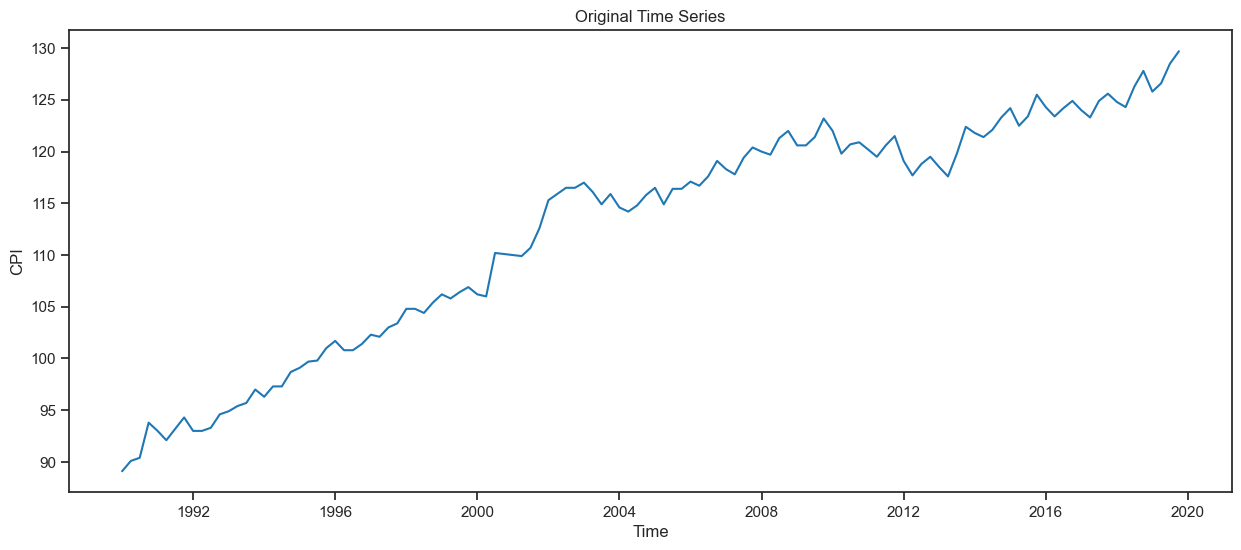

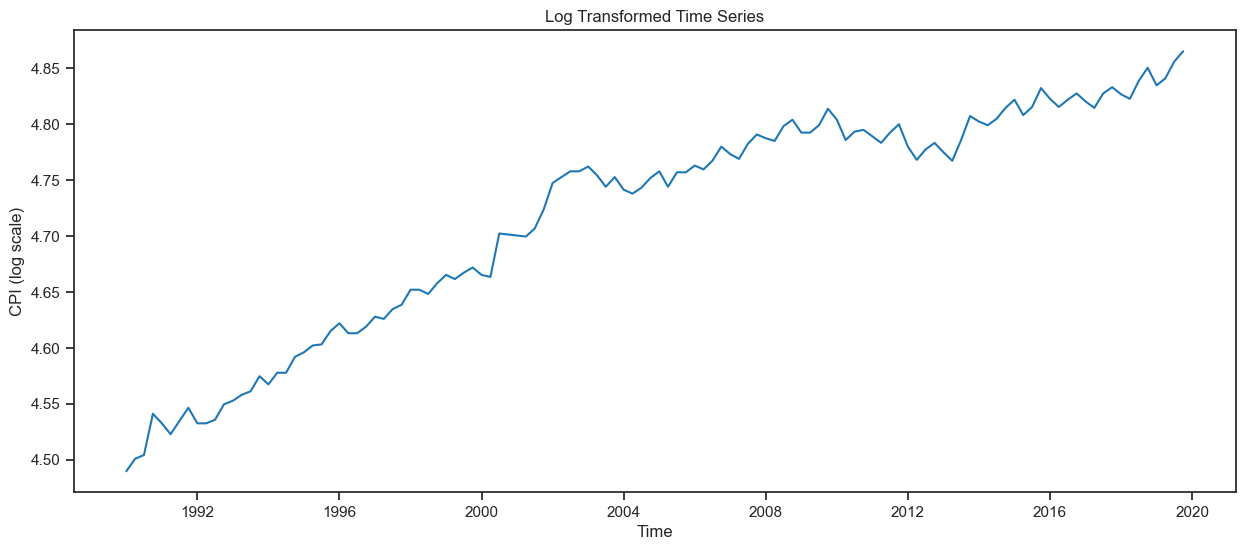

In [82]:
y.index = y.index.to_timestamp().copy()

# orginal CPI
plt.figure(figsize=(15, 6))
plt.plot(y.index, y)
plt.xlabel('Time')
plt.ylabel('CPI')
plt.title('Original Time Series')
plt.show()

# log CPI
log_y = np.log(y)
plt.figure(figsize=(15, 6))
plt.plot(y.index, log_y)
plt.xlabel('Time')
plt.ylabel('CPI (log scale)')
plt.title('Log Transformed Time Series')
plt.show()

log CPI: first difference

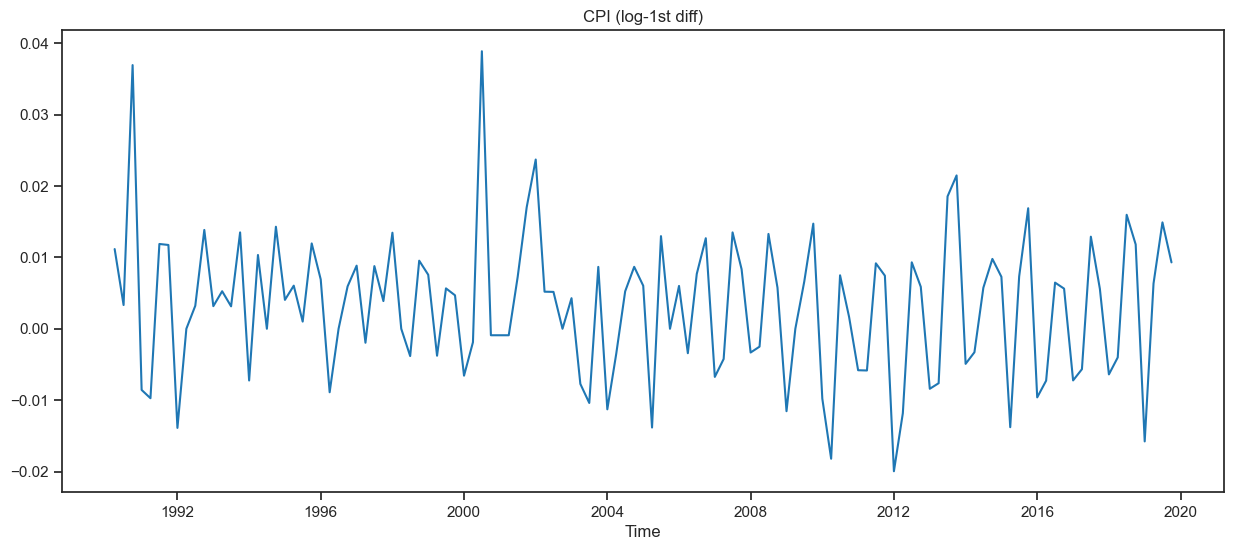

In [83]:
# take the 1st order diff
log_y_diff = log_y - log_y.shift()
log_y_diff.dropna(inplace=True)

# Plot the 1st-differencing series
plt.figure(figsize = (15,6))
plt.plot(log_y_diff)
plt.title("CPI (log-1st diff)")
plt.xlabel('Time')
plt.show()

ACF & PACF (Log): after First Difference

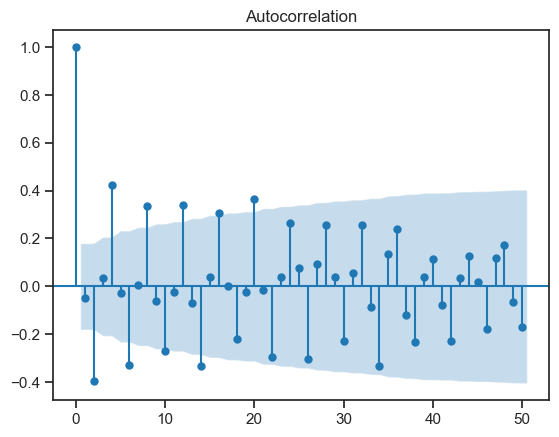

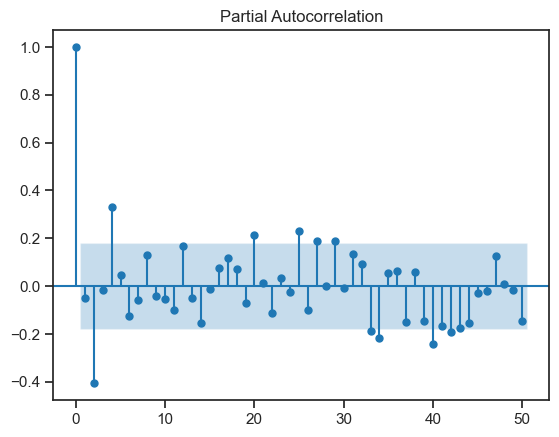

In [84]:
# Sample ACF
smt.graphics.tsa.plot_acf(log_y_diff, lags=50, alpha = 0.05)
plt.show()

# Sample PACF
smt.graphics.tsa.plot_pacf(log_y_diff, lags=50, alpha = 0.05)
plt.show()

Statistical Test: stationary

In [85]:
adf_test(log_y_diff)

Results of Dickey-Fuller Test:
Test Statistic                  -4.623889
p-value                          0.000117
#Lags Used                       3.000000
Number of Observations Used    115.000000
Critical Value (1%)             -3.488535
Critical Value (5%)             -2.887020
Critical Value (10%)            -2.580360
dtype: float64


In [86]:
kpss_test(log_y_diff)

Results of KPSS Test:
Test Statistic            0.293296
p-value                   0.100000
#Lags Used               34.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


In [87]:
# Create an ARIMA (2,1,0) model
model = ARIMA(log_y_diff, order=(2, 1, 0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                    CPI   No. Observations:                  119
Model:                 ARIMA(2, 1, 0)   Log Likelihood                 361.330
Date:                Wed, 29 May 2024   AIC                           -716.660
Time:                        17:33:59   BIC                           -708.348
Sample:                    04-01-1990   HQIC                          -713.285
                         - 10-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5123      0.075     -6.835      0.000      -0.659      -0.365
ar.L2         -0.5531      0.075     -7.381      0.000      -0.700      -0.406
sigma2         0.0001   1.66e-05      7.646      0.0

In [88]:
forecast_arima = pd.DataFrame(model_fit.forecast(119))
forecast_arima.set_index(log_y_diff.index, inplace = True)
forecast_arima.head()

,predicted_mean
Quarter,
1990-04-01,0.007432
1990-07-01,0.011485
1990-10-01,0.010439
1991-01-01,0.008733
1991-04-01,0.010185


In [89]:
mse = mean_squared_error(data_train.iloc[1:], forecast_arima)  
print("MSE: {:.4f}".format(mse))

MSE: 12808.4890


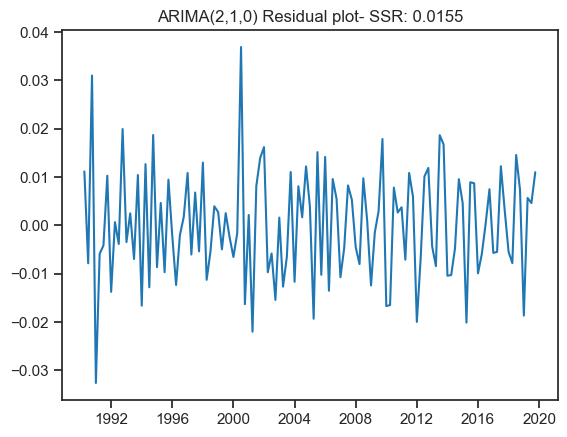

In [90]:
residuals = pd.DataFrame(model_fit.resid)

# Plot residual and calculate sum of squared residual (SSR)
plt.figure()
plt.plot(residuals)
plt.title('ARIMA(2,1,0) Residual plot- SSR: %.4f'% sum((model_fit.resid.values)**2))
plt.show()

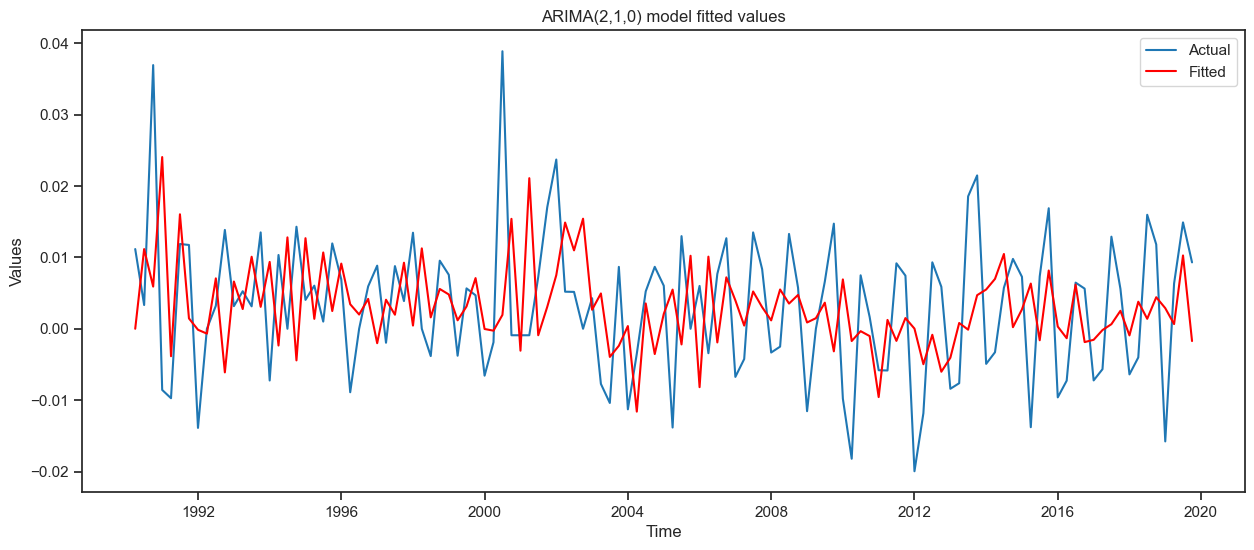

In [91]:
fitted = model_fit.predict(start=0, end=len(log_y_diff)-1, typ='levels', dynamic=False)

plt.figure(figsize=(15, 6))
plt.plot(log_y_diff.index, log_y_diff, label='Actual')
plt.plot(log_y_diff.index, fitted, label='Fitted', color='red')
plt.xlabel('Time')
plt.ylabel('Values')
plt.title("ARIMA(2,1,0) model fitted values")
plt.legend()
plt.show()

Using AIC to select orders (p,q)

In [92]:
import statsmodels.tsa.stattools as st 
import warnings
warnings.filterwarnings("ignore") # turing off Python warning about future release related to the following code

order = st.arma_order_select_ic(log_y_diff,max_ar=10,max_ma=10,ic=['aic'])
order

{'aic':             0           1           2           3           4           5   \
 0  -754.435849 -753.695456 -763.030419 -762.224054 -771.039114 -769.324617   
 1  -752.737062         NaN         NaN         NaN         NaN         NaN   
 2  -771.490041         NaN         NaN         NaN         NaN         NaN   
 3  -769.567753         NaN         NaN         NaN         NaN         NaN   
 4  -782.497948         NaN         NaN         NaN         NaN         NaN   
 5  -780.697579         NaN         NaN         NaN         NaN         NaN   
 6  -781.020708         NaN         NaN         NaN         NaN         NaN   
 7  -779.300974         NaN         NaN         NaN         NaN         NaN   
 8  -779.859226         NaN         NaN         NaN         NaN         NaN   
 9  -778.364751         NaN         NaN         NaN         NaN         NaN   
 10 -776.728235         NaN         NaN         NaN         NaN         NaN   
 
             6           7           8     

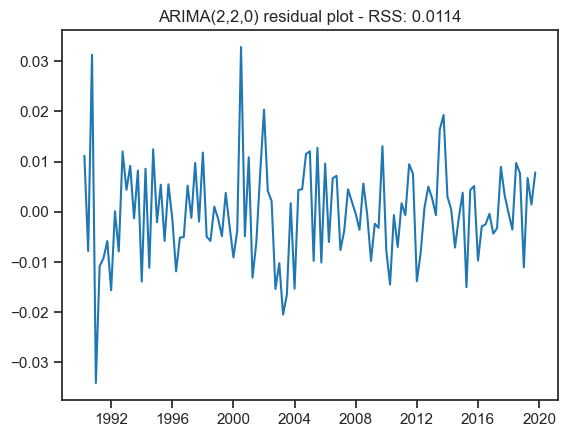

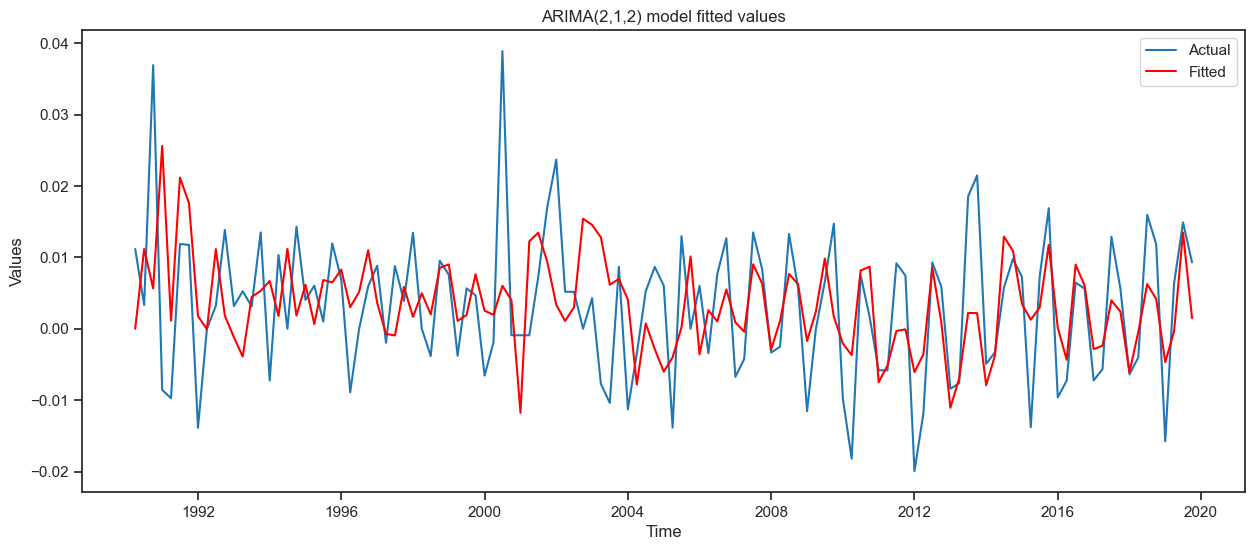

In [93]:
p, q = 2, 2
model_AIC = ARIMA(log_y_diff, order=(p, 1, q))
results_AIC_ARIMA = model_AIC.fit()

residuals_AIC = pd.DataFrame(results_AIC_ARIMA.resid)

plt.figure()
plt.plot(residuals_AIC)
plt.title('ARIMA(2,2,0) residual plot - RSS: %.4f' % sum((results_AIC_ARIMA.resid.values)**2))
plt.show()

fitted_AIC = results_AIC_ARIMA.predict(start=0, end=len(log_y_diff)-1, typ='levels', dynamic=False)

plt.figure(figsize=(15, 6))
plt.plot(log_y_diff.index, log_y_diff, label='Actual')
plt.plot(log_y_diff.index, fitted_AIC, label='Fitted', color='red')
plt.xlabel('Time')
plt.ylabel('Values')
plt.title("ARIMA(2,1,2) model fitted values")
plt.legend()
plt.show()


In [94]:
# ARIMA(2,1,2)
model = ARIMA(log_y_diff, order=(2, 1, 0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                    CPI   No. Observations:                  119
Model:                 ARIMA(2, 1, 0)   Log Likelihood                 361.330
Date:                Wed, 29 May 2024   AIC                           -716.660
Time:                        17:34:45   BIC                           -708.348
Sample:                    04-01-1990   HQIC                          -713.285
                         - 10-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5123      0.075     -6.835      0.000      -0.659      -0.365
ar.L2         -0.5531      0.075     -7.381      0.000      -0.700      -0.406
sigma2         0.0001   1.66e-05      7.646      0.0

In [95]:
forecast_arima = pd.DataFrame(model_fit.forecast(119))
forecast_arima.set_index(log_y_diff.index, inplace = True)
forecast_arima.head()

,predicted_mean
Quarter,
1990-04-01,0.007432
1990-07-01,0.011485
1990-10-01,0.010439
1991-01-01,0.008733
1991-04-01,0.010185


In [96]:
mse = mean_squared_error(data_train.iloc[1:], forecast_arima)  
print("MSE: {:.4f}".format(mse))

MSE: 12808.4890


## Summary Table

keep last 4 decimal places

| Model | train set MSE | validation set MSE|
|----------|----------|----------|
| Random Walk | |1.2164|
|   Seasonal Random Walk (m=12)|    |   0.1882|
|    Unstandarised SES Model    |    1.3683 (slightly smaller than standarised SES)   | 1.7228  |
|    Standarised SES Model    |     1.3683  |  - |
|   Holt-Winters Additive Model (m=4)|    1.187 |  0.1007 |
|   Holt-Winters Additive Model (m=8)|    1.695 |  - |
|   Holt-Winters Additive Model (m=12)|    2.086 |  - |
|   Trend Corrected Exponential Smoothing|  1.302 | -|
|   ARIMA(2,1,0)| 382.4253| - |
|   ARIMA(1,1,0)|409.7529|-|
|   ARIMA(4,1,0)|450.2530| -|

## Prediction Error

In [97]:
data_train

,CPI
Quarter,
1990-03-01,89.1
1990-06-01,90.1
1990-09-01,90.4
1990-12-01,93.8
1991-03-01,93.0
1991-06-01,92.1
1991-09-01,93.2
1991-12-01,94.3
1992-03-01,93.0


In [ ]:
# Forecast the next 8 points
np.random.seed(2820)
n_samples = 1000 
forecast = ahw.forecast(steps=8)
print(forecast)

In [ ]:
# Given forecast values
# Generate by GPT
forecast_values = [128.18960141, 127.57889072, 128.9795849, 130.00223099, 
                   129.26037115, 128.64966047, 130.05035464, 131.07300074]

# Create a new DataFrame for the forecast
forecast_data = {
    'Quarter': ['3/1/2020', '6/1/2020', '9/1/2020', '12/1/2020', '3/1/2021', '6/1/2021', '9/1/2021', '12/1/2021'],
    'CPI': forecast_values
}

forecast_df = pd.DataFrame(forecast_data)

# Save forecast to CSV
forecast_path = 'CPI_forecast.csv'
forecast_df.to_csv(forecast_path, index=False)

forecast_df.head()


`CPI_test`:

In [ ]:
data_test = pd.read_csv('CPI_test.csv', index_col='Quarter', dayfirst=True)
print(data_test.shape)
data_test.head()

In [ ]:
data_test.index = pd.to_datetime(data_test.index)

In [ ]:
data_test

In [ ]:
mse = mean_squared_error(data_test['CPI'], forecast)
print(f'MSE: {mse}')

## References:

DN, C. (2019, May 20). [python] Time series analysis process. [python] Time series analysis process_sklearn python time series-CSDN blog. https://blog.csdn.net/jh1137921986/article/details/90257764?spm=1001.2101.3001.6650.1&utm_medium=distribute.pc_relevant.none-task-blog-2~default~CTRLIST~Rate-1-90257764-blog-135772961.235%5Ev43%5Econtrol&depth_1-utm_source=distribute.pc_relevant.none-task-blog-2~default~CTRLIST~Rate-1-90257764-blog-135772961.235%5Ev43%5Econtrol&utm_relevant_index=2 